# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline


# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

In [3]:
#How big is the dataset
customers.shape

(440, 8)

In [4]:
#What type of data they include
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
#Some basic information, shows columns with continous data, and "Channel" & "Region" with different paterns.
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
#Channel is a categorical columns with only two values (1.Horeca, 2.Retail)
customers['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [8]:
#Region is also a categorical. (1.Lisbon, 2.Porto, 3.Other Region)
customers['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [9]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [10]:
# Your code here:
    #WHAT DOES EACH COLUMN MEAN?
    #Two columns with nominal values "Region" and "Channel", rest of the columns shows money spend by each customer in the different supermarket departments
        #supermarket departments are: Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen.
    #ANY CATEGORICAL DATA TO CONVERT?
        #The two categorical data 'Region' and 'Channel' are already converted
    #ANY MISSING DATA TO REMOVE?
        #Checked before, there are no missing data at all.

In [11]:
#COLUMN COLLINEARITY - ANY HIGH CORRELATIONS?
customers.corr()
    #Detect a high direct-correlation between Grocery and Detergents_Paper

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


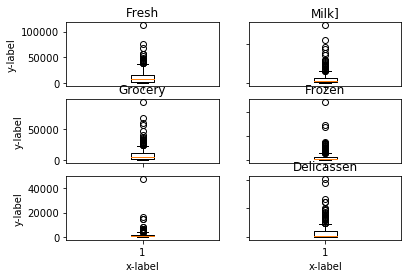

In [12]:
#DESCRIPTIVE STATISTICS - ANY OUTLIERS TO REMOVE?
    #There are some outliers, but I decide to keep them.
    
import seaborn as sns
# sns.boxplot(x=customers['Fresh'])
# sns.boxplot(x=customers['Milk'])
# sns.boxplot(x=customers['Grocery'])
# sns.boxplot(x=customers['Frozen'])
# sns.boxplot(x=customers['Detergents_Paper'])
# sns.boxplot(x=customers['Delicassen'])



fig, axs = plt.subplots(3, 2)
axs[0, 0].boxplot(x=customers['Fresh'])
axs[0, 0].set_title('Fresh')
axs[0, 1].boxplot(x=customers['Milk'])
axs[0, 1].set_title('Milk]')
axs[1, 0].boxplot(x=customers['Grocery'])
axs[1, 0].set_title('Grocery')
axs[1, 1].boxplot(x=customers['Frozen'])
axs[1, 1].set_title('Frozen')
axs[2, 1].boxplot(x=customers['Detergents_Paper'])
axs[2, 1].set_title('Detergents_Paper')
axs[2, 0].boxplot(x=customers['Delicassen'])
axs[2, 1].set_title('Delicassen')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [36]:
# COLUMN-WISE DATA DISTRIBUTION - IS THE DISTRIBUTION SKEWED?

# skewness = 0 : normally distributed.
# skewness > 0 : more weight in the left tail of the distribution.
# skewness < 0 : more weight in the right tail of the distribution. 

from scipy.stats import skew 
print(f"Fresh's Skew: {skew(customers['Fresh'])}")
print(f"Milk's Skew: {skew(customers['Milk'])}")
print(f"Grocery's Skew: {skew(customers['Grocery'])}")
print(f"Frozen's Skew: {skew(customers['Frozen'])}")
print(f"Detergents_Paper's Skew: {skew(customers['Detergents_Paper'])}")
print(f"Delicassen's Skew: {skew(customers['Delicassen'])}")

Fresh's Skew: 2.5525826879071585
Milk's Skew: 4.039922122788577
Grocery's Skew: 3.5751872200807875
Frozen's Skew: 5.887825728957787
Detergents_Paper's Skew: 3.6194575783115934
Delicassen's Skew: 11.113533648709097


In [37]:
# Your observations here

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [38]:
# Your code here
# I decide not to do the cleaning of the outliers. The data we are working with is sales from a supermarket.
# What we want to detect are the outliers (spend more money) so precisely are the more need and see how much do they represent.

In [13]:
# Trying to do some Pareto Analysis.... will create new columns
# customers['total_spend'] = customers['Milk'] + customers['Grocery'] + customers['Fresh'] + customers['Frozen'] + customers['Detergents_Paper'] + customers['Delicassen']
# customers['spendpercentage'] = customers['total_spend'] / customers['total_spend'].sum() * 100
# customers.head(1)

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [14]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
#it does not have sense to Scale the nominal columns so we will not scale them.
customers_nom = customers[['Channel','Region']]
customers = customers.drop(columns = (['Channel', 'Region']))

In [15]:
customers_columns = list(customers.columns)

In [16]:
scaler = StandardScaler()
scaler.fit(customers)
customers_array = scaler.transform(customers)

In [17]:
df = pd.DataFrame(customers_array, columns= customers_columns)
df.head(1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339


In [19]:
#Change the name of my dataset to 'final'
final = pd.merge(customers_nom, df, left_index = True, right_index = True)
final.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [20]:
# Your code here:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Count the values in `labels`.

In [29]:
# Your code here:
kmeans.labels_

array([6, 6, 6, 0, 1, 6, 6, 6, 0, 6, 6, 0, 1, 6, 6, 0, 6, 0, 6, 0, 0, 0,
       1, 3, 6, 6, 0, 0, 3, 1, 0, 0, 0, 1, 0, 6, 1, 6, 6, 1, 1, 0, 6, 3,
       6, 3, 6, 2, 6, 3, 0, 0, 1, 6, 1, 0, 3, 6, 0, 0, 6, 2, 6, 6, 0, 3,
       0, 6, 0, 0, 0, 1, 0, 0, 6, 0, 0, 3, 0, 0, 0, 6, 6, 0, 6, 2, 2, 1,
       0, 1, 0, 0, 3, 4, 6, 0, 6, 0, 0, 0, 6, 6, 6, 1, 0, 0, 6, 6, 6, 6,
       0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 1, 1, 0, 6, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 3, 6, 0, 6, 6, 6, 0, 0, 3, 6, 6, 6, 0, 0, 0, 6, 3, 0, 6, 0, 6,
       1, 0, 0, 0, 0, 1, 6, 5, 0, 0, 0, 0, 6, 6, 0, 0, 0, 6, 0, 0, 1, 7,
       7, 7, 3, 3, 1, 7, 7, 3, 7, 7, 7, 3, 7, 3, 7, 7, 6, 6, 3, 7, 6, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7,
       7, 7, 7, 6, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 1, 1, 7, 7, 7, 7,
       6, 7, 6, 7, 6, 7, 7, 7, 7, 1, 0, 0, 1, 0, 0, 6, 0, 6, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 6, 7, 7, 7, 6, 6, 7, 6,

In [30]:
final['labels'] = kmeans.labels_
final['labels'].value_counts()

#if not expecified kmeans by default make clusters. I think 5 will make better results

0    173
6     98
7     86
1     45
3     30
2      5
4      2
5      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [31]:
# Your code here
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5)
clustering.fit(final)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

Count the values in `labels_DBSCAN`.

In [32]:
# Your code here
final['labels_DBSCAN'] = clustering.labels_
final['labels_DBSCAN'].value_counts()

-1    259
 1    126
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

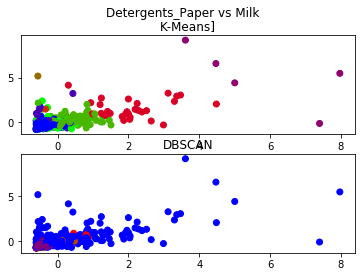

In [49]:
# Your code here:
# plt.figure()
# plt.subplot(211)
# plt.scatter(final['Detergents_Paper'],final['Milk'],c=final['labels'],cmap='brg')
# plt.subplot(212)
# plt.scatter(final['Detergents_Paper'],final['Milk'],c=final['labels_DBSCAN'],cmap='brg')


fig, axs = plt.subplots(2)
fig.suptitle('Detergents_Paper vs Milk')
axs[0].set_title('K-Means]')
axs[0].scatter(final['Detergents_Paper'],final['Milk'],c=final['labels'],cmap='brg')
axs[1].set_title('DBSCAN')
axs[1].scatter(final['Detergents_Paper'],final['Milk'],c=final['labels_DBSCAN'],cmap='brg')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

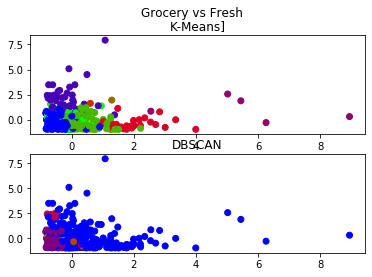

In [47]:
# Your code here:
fig, axs = plt.subplots(2)
fig.suptitle('Grocery vs Fresh')
axs[0].set_title('K-Means]')
axs[0].scatter(final['Grocery'],final['Fresh'],c=final['labels'],cmap='brg')
axs[1].set_title('DBSCAN')
axs[1].scatter(final['Grocery'],final['Fresh'],c=final['labels_DBSCAN'],cmap='brg')


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

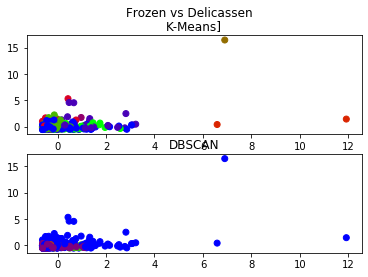

In [48]:
# Your code here:
fig, axs = plt.subplots(2)
fig.suptitle('Frozen vs Delicassen')
axs[0].set_title('K-Means]')
axs[0].scatter(final['Frozen'],final['Delicassen'],c=final['labels'],cmap='brg')
axs[1].set_title('DBSCAN')
axs[1].scatter(final['Frozen'],final['Delicassen'],c=final['labels_DBSCAN'],cmap='brg')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [51]:
# Your code here:
final.groupby(['labels']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.023121,3.000000,-0.240856,-0.410420,-0.499207,-0.072311,-0.461708,-0.194211,0.456647
1,1.088889,2.755556,2.113573,-0.086140,-0.215498,0.653998,-0.403945,0.426930,-0.666667
2,2.000000,2.800000,1.076764,5.109117,5.638317,-0.089899,5.688837,0.420295,-1.000000
3,2.000000,2.333333,-0.448470,1.509580,1.916734,-0.254092,2.072632,0.348467,-1.000000
4,1.000000,2.500000,0.792784,0.561685,-0.011301,9.252557,-0.464047,0.933164,-1.000000
5,1.000000,3.000000,1.966817,5.175503,1.287217,6.900600,-0.554862,16.478447,-1.000000
6,1.938776,2.755102,-0.371352,0.305323,0.462364,-0.368855,0.461134,-0.011292,-0.387755
7,1.081395,1.325581,-0.145725,-0.374124,-0.421042,0.022027,-0.421842,-0.179151,1.488372


In [52]:
final.groupby(['labels_DBSCAN']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.482625,2.459459,0.154881,0.332963,0.357552,0.143354,0.297163,0.191672,3.899614
0,2.000000,3.000000,-0.047439,-0.306575,-0.128764,-0.484978,0.142681,-0.449668,6.000000
1,1.000000,3.000000,-0.275852,-0.531200,-0.582522,-0.193004,-0.500575,-0.281582,0.000000
2,1.000000,3.000000,2.330913,-0.593472,-0.609298,-0.370277,-0.517654,-0.262725,1.000000
3,2.000000,3.000000,-0.763329,0.600725,0.412071,-0.507786,0.608619,-0.337985,6.000000
4,2.000000,3.000000,-0.707052,0.040639,0.253227,-0.428514,0.376715,0.107053,6.000000
5,1.000000,1.000000,-0.171174,-0.548618,-0.609922,-0.321448,-0.534924,-0.303818,7.000000
6,1.000000,1.000000,-0.409825,-0.522690,-0.587695,0.764752,-0.523890,-0.323478,7.000000
7,1.000000,2.000000,-0.356662,-0.577682,-0.481258,-0.102396,-0.557298,-0.207274,7.000000


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here